In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dogs = pd.read_csv('../datasets/dogs.csv')

In [3]:
dogs

,breed,height,weight
0,Border Collie,20,45
1,Boston Terrier,16,20
2,Brittany Spaniel,18,35
3,Bullmastiff,27,120
4,Chihuahua,8,8
5,German Shepherd,25,78
6,Golden Retriever,23,70
7,Great Dane,32,160
8,Portuguese Water Dog,21,50
9,Standard Poodle,19,65


In [4]:
feature_names = dogs.columns[1:]

In [5]:
X = dogs[feature_names]

In [6]:
X

,height,weight
0,20,45
1,16,20
2,18,35
3,27,120
4,8,8
5,25,78
6,23,70
7,32,160
8,21,50
9,19,65


In [7]:
from sklearn.preprocessing import MinMaxScaler

In [8]:
scaler = MinMaxScaler()

In [9]:
scaler.fit(X)

MinMaxScaler()

In [10]:
X = pd.DataFrame(scaler.transform(X), columns=feature_names)

In [11]:
X

,height,weight
0,0.538462,0.248366
1,0.384615,0.084967
2,0.461538,0.183007
3,0.807692,0.738562
4,0.076923,0.006536
5,0.730769,0.464052
6,0.653846,0.411765
7,1.000000,1.000000
8,0.576923,0.281046
9,0.500000,0.379085


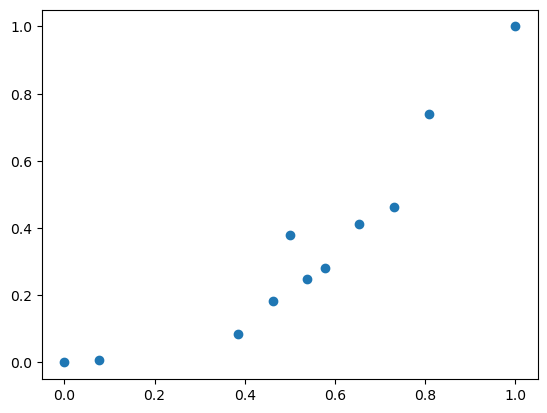

In [20]:
plt.scatter(X['height'], X['weight'])

In [12]:
from sklearn.cluster import KMeans

In [13]:
kmeans = KMeans(n_clusters=2, n_init='auto')

In [14]:
kmeans.fit(X)

KMeans(n_clusters=2)

In [15]:
kmeans.labels_

array([0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int32)

In [16]:
kmeans.cluster_centers_

array([[0.43589744, 0.22875817],
       [0.90384615, 0.86928105]])

In [17]:
centers = pd.DataFrame(kmeans.cluster_centers_, columns=feature_names)

In [18]:
centers

,height,weight
0,0.435897,0.228758
1,0.903846,0.869281


In [19]:
kmeans.inertia_

0.7828436301619695

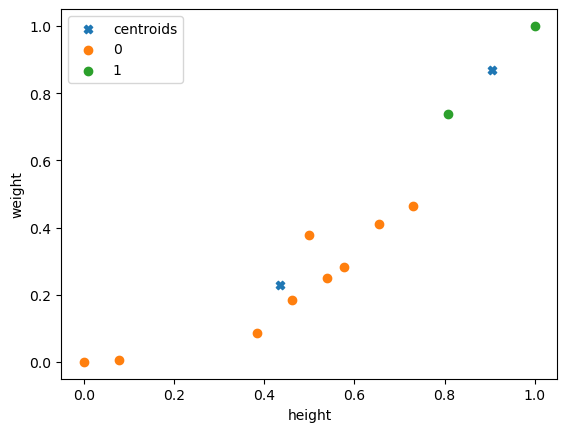

In [22]:
plt.scatter(centers['height'], centers['weight'], marker='X', label='centroids')

for c in np.unique(kmeans.labels_):
    elems = X[kmeans.labels_ == c]
    plt.scatter(elems['height'], elems['weight'], label=c)
    
plt.xlabel('height')
plt.ylabel('weight')
plt.legend()
plt.show()

In [23]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [24]:
silhouette_values = silhouette_samples(X, kmeans.labels_)

In [25]:
silhouette_values

array([0.63311803, 0.6561122 , 0.66558095, 0.49228481, 0.58416901,
       0.0300102 , 0.32885172, 0.66221161, 0.59082202, 0.5334069 ,
       0.55473224])

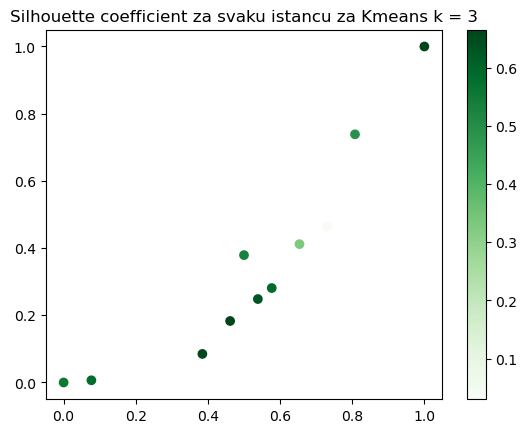

In [27]:
plt.scatter(X['height'], X['weight'], c=silhouette_values, cmap='Greens')
plt.colorbar()
plt.title('Silhouette coefficient za svaku istancu za Kmeans k = 3')
plt.show()

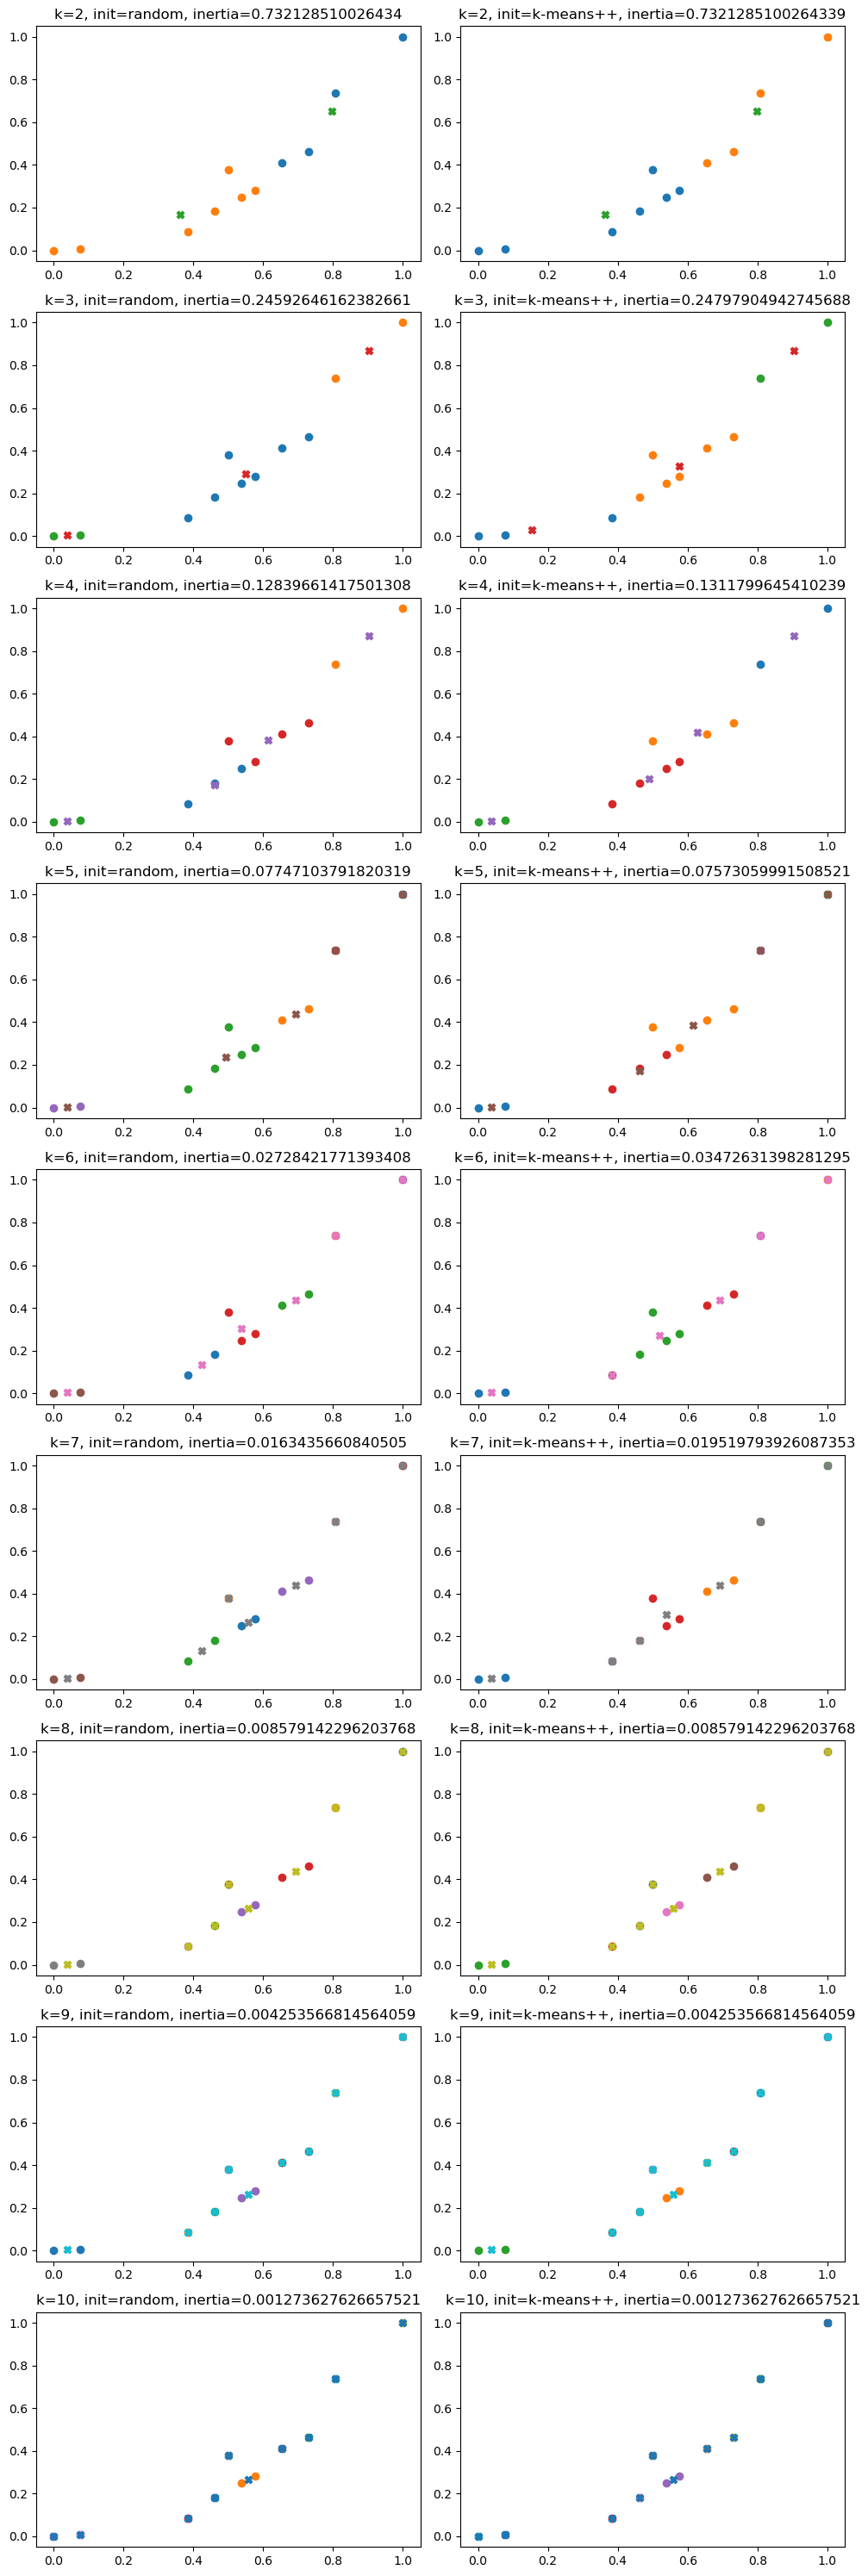

In [28]:
ks = range(2, X.shape[0])
inits = ['random', 'k-means++']
fig = plt.figure(figsize=(10,30))
idx = 1
silhouette = []
inetrias = []

for k in ks:
    for init in inits:
        kmeans = KMeans(n_clusters=k, init=init, n_init='auto')
        kmeans.fit(X)
        
        if init == 'k-means++':
            silhouette.append(silhouette_score(X, kmeans.labels_))
            inetrias.append(kmeans.inertia_)
            
        fig.add_subplot(len(ks), len(inits), idx)
        idx += 1
        
        for label in np.unique(kmeans.labels_):
            elems = X[kmeans.labels_ == label]
            plt.scatter(elems['height'], elems['weight'])
            
        centroids = pd.DataFrame(kmeans.cluster_centers_, columns=feature_names)
        plt.scatter(centroids['height'], centroids['weight'], marker='X', label='centroids')
        
        plt.title(f'k={k}, init={init}, inertia={kmeans.inertia_}')
        
plt.tight_layout()

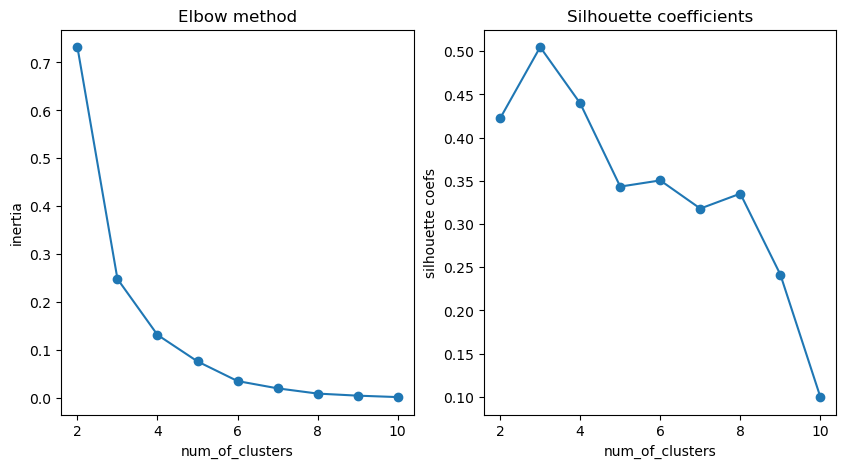

In [29]:
fig = plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.plot(ks, inetrias, marker='o')
plt.xlabel('num_of_clusters')
plt.ylabel('inertia')
plt.title('Elbow method')

plt.subplot(1, 2, 2)
plt.plot(ks, silhouette, marker='o')
plt.xlabel('num_of_clusters')
plt.ylabel('silhouette coefs')
plt.title('Silhouette coefficients')

plt.show()

In [30]:
# kompresija slike

In [31]:
from matplotlib.image import imread

In [32]:
import seaborn as sns

In [33]:
img = imread('../datasets/masa.jpg')

In [34]:
img_size = img.shape

In [35]:
X_img = img.reshape(img_size[0]*img_size[1], img_size[2])

In [36]:
km = KMeans(n_clusters=30, n_init='auto')

In [37]:
km.fit(X_img)

KMeans(n_clusters=30)

In [38]:
X_compressed = km.cluster_centers_[km.labels_]

In [39]:
X_compressed = np.clip(X_compressed.astype('uint'), 0, 255)

In [40]:
X_compressed = X_compressed.reshape(img_size[0], img_size[1], img_size[2])

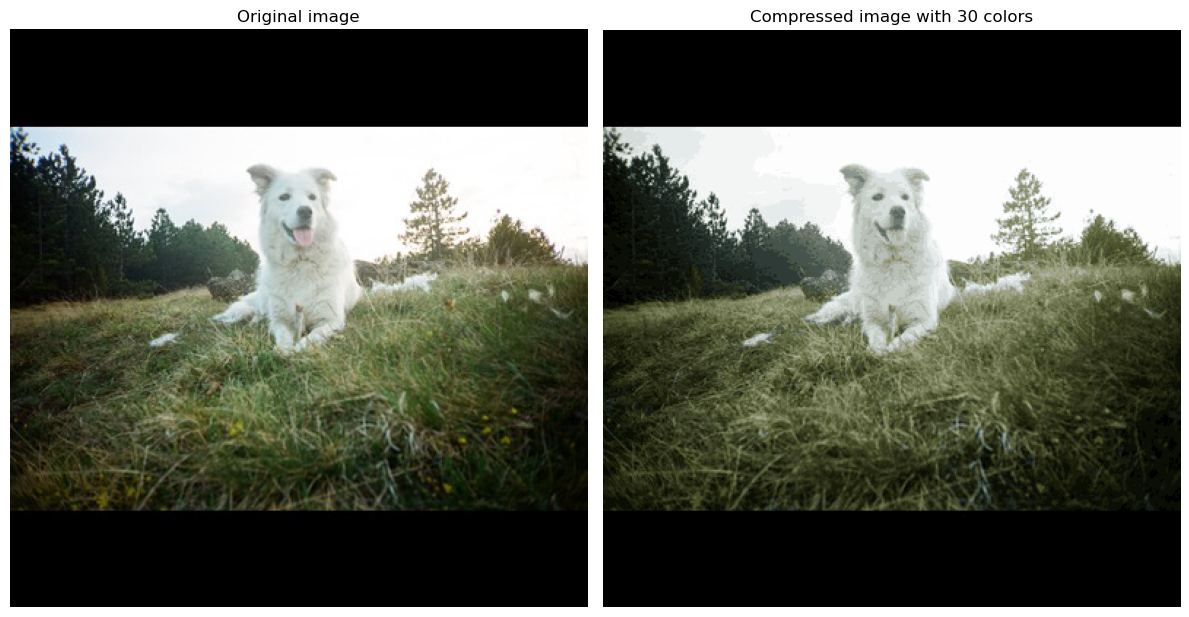

In [41]:
fig, ax = plt.subplots(1, 2, figsize=(12,8))

ax[0].imshow(img)
ax[0].set_title('Original image')

ax[1].imshow(X_compressed)
ax[1].set_title('Compressed image with 30 colors')

for ax in fig.axes:
    ax.axis('off')
    
plt.tight_layout()

In [42]:
from sklearn.cluster import BisectingKMeans

In [43]:
bkmeans = BisectingKMeans(n_clusters=3, bisecting_strategy='largest_cluster')

In [44]:
bkmeans.fit(X)

BisectingKMeans(bisecting_strategy='largest_cluster', n_clusters=3)

In [45]:
centroids = pd.DataFrame(bkmeans.cluster_centers_, columns=feature_names)

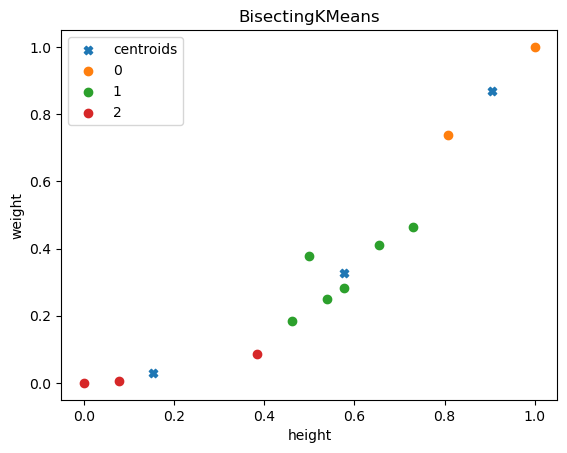

In [46]:
plt.scatter(centroids['height'], centroids['weight'], marker='X', label='centroids')

for c in np.unique(bkmeans.labels_):
    elems = X[bkmeans.labels_ == c]
    plt.scatter(elems['height'], elems['weight'], label=c)
    
plt.title('BisectingKMeans')
plt.xlabel('height')
plt.ylabel('weight')
plt.legend()
plt.show()

In [47]:
from fcmeans import FCM 

In [48]:
fcm = FCM(n_clusters=3, m=3)

In [49]:
fcm.fit(X.to_numpy())

In [50]:
labels = fcm.predict(X.to_numpy())

In [51]:
centers = fcm.centers

In [52]:
centers

array([[0.55558977, 0.30047192],
       [0.91434056, 0.87698864],
       [0.06538772, 0.01166016]])

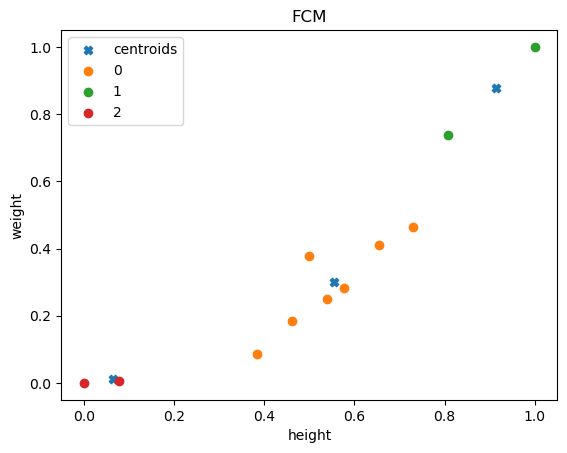

In [53]:
plt.scatter(fcm.centers[:,0], fcm.centers[:,1], marker='X', label='centroids')

for c in np.unique(labels):
    elems = X[labels == c]
    plt.scatter(elems['height'], elems['weight'], label=c)
    
plt.xlabel('height')
plt.ylabel('weight')
plt.title('FCM')
plt.legend()
plt.show()

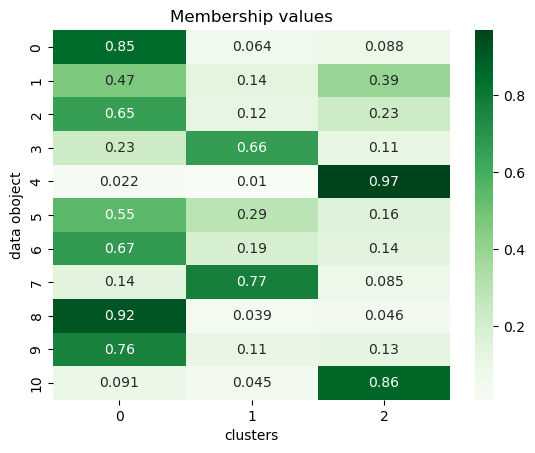

In [55]:
sns.heatmap(fcm.soft_predict(X.to_numpy()), cmap='Greens', annot=True)
plt.title('Membership values')
plt.xlabel('clusters')
plt.ylabel('data oboject')
plt.show()